In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def de_bruijn(k, n):
    try:
        # let's see if k can be cast to an integer;
        # if so, make our alphabet a list
        _ = int(k)
        if k > 26:
            raise ValueError("k cannot exceed 26")

        alphabet = [str(i) if i<10 else chr(ord('A') + i - 10) for i in range(k)]

    except (ValueError, TypeError):
        alphabet = k
        k = len(k)

    a = [0] * k * n
    sequence = []

    def db(t, p):
        if t > n:
            if n % p == 0:
                sequence.extend(a[1:p + 1])
        else:
            a[t] = a[t - p]
            db(t + 1, p)
            for j in range(a[t - p] + 1, k):
                a[t] = j
                db(t + 1, t)
    db(1, 1)
    return "".join(alphabet[i] for i in sequence)

In [136]:
def pattern_generator(stripe_width, stripe_gap, sequence, colors):
    width = len(sequence) * 20
    height = width
    image = np.zeros((height, width, 3), np.uint8)
    
    for col in range(width):
        step = int(col / (stripe_width + stripe_gap))
        pixel = col % (stripe_width + stripe_gap)

        seq = sequence[step]
        color = colors[int(seq)]
        
        if pixel > stripe_gap:
            image[:, col] = color
        else:
            image[:, col] = (0, 0, 0) # set black
    return image


In [137]:
patterns = (de_bruijn(3, 5))

In [138]:
len(patterns)

243

In [139]:
print(patterns, ",")

000001000020001100012000210002200101001020011100112001210012200201002020021100212002210022201011010120102101022011020111101112011210112201202012110121201221012220202102022021110211202121021220221102212022210222211111211122112121122212122122222 ,


In [140]:
print (','.join(patterns))

0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,1,0,0,0,1,2,0,0,0,2,1,0,0,0,2,2,0,0,1,0,1,0,0,1,0,2,0,0,1,1,1,0,0,1,1,2,0,0,1,2,1,0,0,1,2,2,0,0,2,0,1,0,0,2,0,2,0,0,2,1,1,0,0,2,1,2,0,0,2,2,1,0,0,2,2,2,0,1,0,1,1,0,1,0,1,2,0,1,0,2,1,0,1,0,2,2,0,1,1,0,2,0,1,1,1,1,0,1,1,1,2,0,1,1,2,1,0,1,1,2,2,0,1,2,0,2,0,1,2,1,1,0,1,2,1,2,0,1,2,2,1,0,1,2,2,2,0,2,0,2,1,0,2,0,2,2,0,2,1,1,1,0,2,1,1,2,0,2,1,2,1,0,2,1,2,2,0,2,2,1,1,0,2,2,1,2,0,2,2,2,1,0,2,2,2,2,1,1,1,1,1,2,1,1,1,2,2,1,1,2,1,2,1,1,2,2,2,1,2,1,2,2,1,2,2,2,2,2


In [142]:
stripe_width = 10
stripe_black_gap = 10

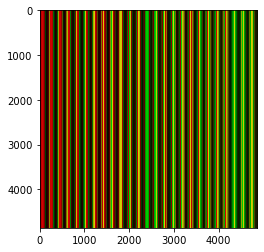

In [147]:
colors = [(255,0,0), (0, 255,0), (255, 255,0)]
image = pattern_generator(stripe_width, stripe_black_gap, patterns, colors)
plt.imshow(image)

In [146]:
cv.imwrite("patterns.png", image)

True